<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_4_2/blob/main/4_Iris_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Iris 데이터 셋

### 실습에 필요한 데이터셋
https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### **iris['필드명']**
* DESCR : 데이터 셋의 정보
* data : feature data
* feature_names : feature data의 column 이름
* target : label data의 숫자
* target_name : label data의 문자

In [ ]:
# sepal length in cm 꽃밭침의 길이
# sepal width in cm 꽃받침의 너비
# petal length in cm 꽃잎의 길이
# petal width in cm 꽃잎의 너비

data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
 df_iris = pd.DataFrame(data, columns=feature_names)
 df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    df_iris.drop('target', 1), df_iris['target']
)

In [ ]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


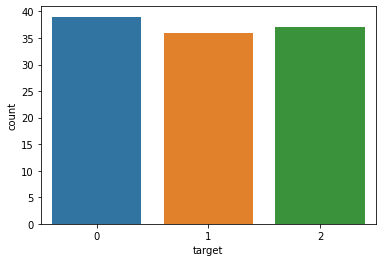

In [ ]:
sns.countplot(y_train)

In [ ]:
# label의 분포를 균등하게 배분
# stratify 사용
x_train, x_valid, y_train, y_valid = train_test_split(
    df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target']
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


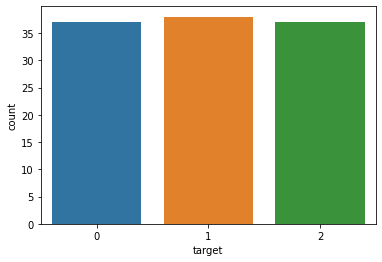

In [ ]:
sns.countplot(y_train)

In [ ]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

In [ ]:
from sklearn.svm import SVC # 분류
from sklearn.metrics import accuracy_score

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(x_valid)
print('정답률 : ', accuracy_score(y_valid, y_pred))

정답률 :  0.9736842105263158
